# load in detrended LCs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def determine_cadence(times):
    time_gaps = {}
    for ii in range(1, len(times)):
        time_gap = np.round(times[ii]-times[ii-1], 4)
        if time_gap in time_gaps.keys():
            time_gaps[time_gap] += 1
        else:
            time_gaps[time_gap] = 1
            
    #find the key that corresponds to the most data gaps, this is the cadence
    cadence = max(time_gaps, key=time_gaps.get)
    return cadence
            
        

In [3]:
kepler_mm = pd.read_csv('mm_kipping_kepler.dat', delimiter='\t', header=None, names=['time', 'flux', 'flux_err'])
baro_mm = pd.read_csv('mm_kipping_baro.dat', delimiter='\t', header=None, names=['time', 'flux', 'flux_err'])
baron_mm = pd.read_csv('mm_kipping_baron.dat', delimiter='\t', header=None, names=['time', 'flux', 'flux_err'])
tess_mm = pd.read_csv('mm_kipping_tess.dat', delimiter=' ', header=None, names=['time', 'flux', 'flux_err'])


x_kepler_mm, y_kepler_mm, yerr_kepler_mm = kepler_mm['time']+2400000-2454833, kepler_mm['flux']-1, kepler_mm['flux_err']
x_baro_mm, y_baro_mm, yerr_baro_mm = baro_mm['time']+2400000-2454833, baro_mm['flux']-1, baro_mm['flux_err']
x_baron_mm, y_baron_mm, yerr_baron_mm = baron_mm['time']+2400000-2454833, baron_mm['flux']-1, baron_mm['flux_err']
x_tess_mm, y_tess_mm, yerr_tess_mm = tess_mm['time']+2400000-2454833, tess_mm['flux']-1, tess_mm['flux_err']



In [4]:
x = np.concatenate((x_kepler_mm.values, x_baro_mm.values, x_baron_mm.values, x_tess_mm.values))
y = np.concatenate((y_kepler_mm.values, y_baro_mm.values, y_baron_mm.values, y_tess_mm.values))
yerr = np.concatenate((yerr_kepler_mm.values, yerr_baro_mm.values, yerr_baron_mm.values, yerr_tess_mm.values))


In [5]:
from collections import OrderedDict

texp_kepler = determine_cadence(x_kepler_mm.values)
texp_baro = determine_cadence(x_baro_mm.values)
texp_baron = determine_cadence(x_baron_mm.values)
texp_tess = determine_cadence(x_tess_mm.values)


datasets = OrderedDict(
    [
        ("Kepler", [x_kepler_mm.values, y_kepler_mm.values, yerr_kepler_mm.values, texp_kepler]),
        ("BARO", [x_baro_mm.values, y_baro_mm.values, yerr_baro_mm.values, texp_baro]),
        ("BARON", [x_baron_mm.values, y_baron_mm.values, yerr_baron_mm.values, texp_baron]),
        ("TESS", [x_tess_mm.values, y_tess_mm.values, yerr_tess_mm.values, texp_tess]),
    ]
)


In [6]:
cols = [
    'rp/r_star', 
    'rho_star',
    'b',
    'period (not sampling param)',
    'tau_0 (not sampling param)',
    'q1_kep',
    'q2_kep',
    'q1_baro',
    'q2_baro',
    'q1_baron',
    'q2_baron',
    'q1_tess',
    'q2_tess',
    'blend_tess',
    't1',
    't2',
    't4',
    't5',
    't6',
    't7',
    't8',
    't9',
    't30',
    'log-likelihood'
]

posteriors = pd.read_csv('./kipping_tranist_model_w_TESS/TTVplan-post_equal_weights.dat', names=cols, sep='    ', )





/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [76]:
ror_med = np.median(posteriors['rp/r_star'])
rho_star_med = np.median(posteriors['rho_star']) * 0.001 #convert from kg/m^3 to g/cm^3
b_med = np.median(posteriors['b'])
p_med = np.median(posteriors['period (not sampling param)'])
q1_Kepler_med = np.median(posteriors['q1_kep'])
q2_Kepler_med = np.median(posteriors['q2_kep'])
q1_BARO_med = np.median(posteriors['q1_baro'])
q2_BARO_med = np.median(posteriors['q2_baro'])
q1_BARON_med = np.median(posteriors['q1_baron'])
q2_BARON_med = np.median(posteriors['q2_baron'])
q1_TESS_med = np.median(posteriors['q1_tess'])
q2_TESS_med = np.median(posteriors['q2_tess'])
blend_tess_med = np.median(posteriors['blend_tess'])
t1_med = np.median(posteriors['t1'])-54833
t2_med = np.median(posteriors['t2'])-54833
t4_med = np.median(posteriors['t4'])-54833
t5_med = np.median(posteriors['t5'])-54833
t6_med = np.median(posteriors['t6'])-54833
t7_med = np.median(posteriors['t7'])-54833
t8_med = np.median(posteriors['t8'])-54833
t9_med = np.median(posteriors['t9'])-54833
t30_med = np.median(posteriors['t30'])-54833


q_dic = {}
q_dic['q1_Kepler'] = q1_Kepler_med
q_dic['q2_Kepler'] = q2_Kepler_med
q_dic['q1_BARO'] = q1_BARO_med
q_dic['q2_BARO'] = q2_BARO_med
q_dic['q1_BARON'] = q1_BARON_med
q_dic['q2_BARON'] = q2_BARON_med
q_dic['q1_TESS'] = q1_TESS_med
q_dic['q2_TESS'] = q2_TESS_med



transit_times_med = np.array([
    t1_med,
    t2_med,
    t4_med,
    t5_med,
    t6_med,
    t7_med,
    t8_med,
    t9_med,
    t30_med
])

transit_inds_med = np.array([0,1,3,4,5,6,7,8,29])




In [87]:
import pymc3 as pm
import pymc3_ext as pmx
import exoplanet as xo
import aesara_theano_fallback.tensor as tt
from functools import partial
from celerite2.theano import terms, GaussianProcess



# Find a reference transit time near the middle of the observations to avoid
# strong covariances between period and t0
x_min = min(np.min(x) for x, _, _, _ in datasets.values())
x_max = max(np.max(x) for x, _, _, _ in datasets.values())
x_mid = 0.5 * (x_min + x_max)

mid_epoch = np.round((x_mid) / p_med)
t0_ref = p_med * np.round((x_mid - t1_med) / p_med)



with pm.Model() as model:

    # Shared orbital parameters --> impact parameter, transit times, stellar density
    ###########################
    ###########################
    ###########################
    #stellar density
    rho_star = pm.Deterministic('rho_star', tt.constant(rho_star_med))
    
    # impact parameter
    b = pm.Deterministic('b', tt.constant(b_med))
    
    # Now we have a parameter for each transit time for each planet:
    transit_times = pm.Deterministic("transit_times", tt.constant(transit_times_med))

        
    # Now we have a parameter for each transit time for each planet:
    transit_inds = pm.Deterministic("transit_inds", tt.constant(transit_inds_med))
    
    
    
    
    # Set up an orbit for the planets
    orbit = xo.orbits.TTVOrbit(b=b, transit_times=[transit_times], 
                               rho_star=rho_star, transit_inds=[transit_inds])
    
    

    # It will be useful later to track some parameters of the orbit
    #pm.Deterministic("t0", orbit.t0 + orbit.period * mid_epoch)
    pm.Deterministic("period", orbit.period)
    pm.Deterministic("ttvs_{0}".format(0), orbit.ttvs[0])
    
    



    #rp_over_rstar 
    ror = pm.Deterministic('ror', tt.constant(ror_med))
    
    
    # not shared parameters --> depth and limb-darkening
    # Loop over the instruments
    parameters = dict()
    lc_models = dict()
    for n, (name, (x, y, yerr, texp)) in enumerate(datasets.items()):
        # We define the per-instrument parameters in a submodel so that we
        # don't have to prefix the names manually
        with pm.Model(name=name, model=model):
            # The limb darkening
            u = pm.Deterministic('u', tt.constant([q_dic['q1_'+name], q_dic['q2_'+name]]))
            star = xo.LimbDarkLightCurve(u)

            
            
            
            
            #add TESS blend facotr
            if name == 'TESS':
                blend = blend_tess_med
                y = (y+1)/blend - 1
            
    
            

            # Keep track of the parameters for optimization
            if name == 'TESS':
                parameters[name] = [u, blend]
            else:
                parameters[name] = [u]

        
        # The light curve model
        # ror in exoplanet is r/r_sun so divide by stellar radius = 0.95*r_sun
        def lc_model(star, ror, texp, t):
            return pm.math.sum(
                star.get_light_curve(orbit=orbit, r=ror*.95, t=t, texp=texp),
                axis=-1,
            )

        lc_model_partial = partial(lc_model, star, ror, texp)
        lc_models[name] = lc_model_partial
        
        lc_model_obs = lc_model(star, ror, texp, x)
        pm.Normal(f"{name}_obs", mu=lc_model_obs, sd=np.sqrt(yerr**2.), observed=y)



    # Optimize the model
    map_soln = model.test_point
    #map_soln = pmx.optimize(map_soln)

/var/folders/9z/bcj7jltn3x5_8y20r9cxql3h0000gn/T/ipykernel_31117/1128018102.py:35: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(name,
/var/folders/9z/bcj7jltn3x5_8y20r9cxql3h0000gn/T/ipykernel_31117/1128018102.py:35: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(name,
/var/folders/9z/bcj7jltn3x5_8y20r9cxql3h0000gn/T/ipykernel_31117/1128018102.py:35: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(name,
/var/folders/9z/bcj7jltn3x5_8y20r9cxql3h0000gn/T/ipykernel_31117/1128018102.py:35: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(name,


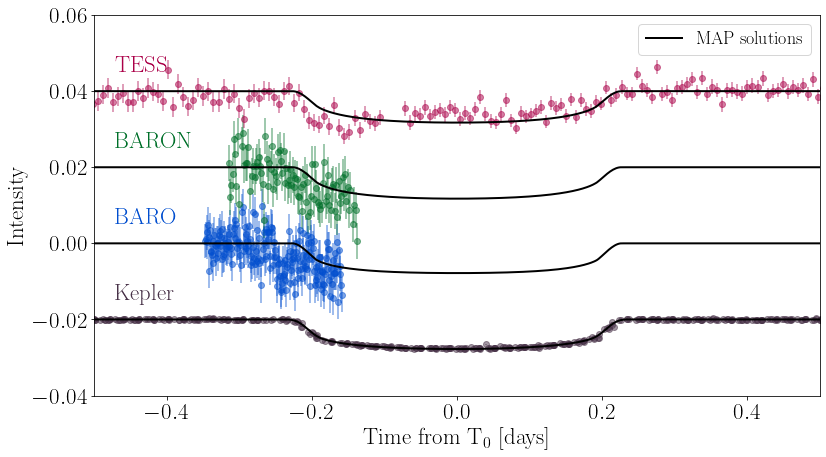

In [92]:
import matplotlib
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23) 
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)

dt = np.linspace(-.5, .5, 500)

with model:
    for n, (name, (x, y, yerr, texp)) in enumerate(datasets.items()):
        if name == 'TESS':
            y = (y+1)/blend_tess_med- 1
        phase_curves = pmx.eval_in_model(
                [lc_models[k](transit_times_med[0] + dt) for k in datasets], map_soln
            )

index = 0

colors = ["#483248", "#014ecf", "#00702a", "#ab0048"]
plt.figure(figsize = [13,7])
shift = -0.02
for n, (name, (x, y, yerr, texp)) in enumerate(datasets.items()):
    # Get the posterior median orbital parameters
    p = 160.884435 # linear ephemeris from kipping + yahalomi, 2022
    t0 = transit_times_med[0]


    # Plot the folded data
    x_fold = (x - t0 + 0.5 * p) % p - 0.5 * p
    plt.errorbar(
        x_fold, y+shift, yerr=yerr, marker='o', ls='', color=colors[index], zorder=-1000, alpha=0.5
    )
    
    
    plt.annotate(name, 
                 xy=(-0.47, shift+.005),  
                 xycoords='data',
                 textcoords='offset points',
                 fontsize = 23,
                 color=colors[index])


    
    
    plt.plot(dt, phase_curves[index]+shift, color='k', lw=2, label='MAP solutions')

    index+=1
    shift+=.02
    
    
plt.xlim(-0.5, 0.5)
plt.ylim(-0.04, 0.06)
plt.ylabel("Intensity", fontsize = 23)
plt.xlabel(r"Time from $\textrm{T}_0$ [days]", fontsize = 23)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=18, loc=1)
plt.savefig('map_soln_Feb22.pdf')
    

plt.show()